In [1]:
import pathlib
import os

pwd = pathlib.Path().absolute()
print(pwd)

rfml_dir = pwd.parent
base_dir = rfml_dir.parent

/Users/zephyr/Desktop/大四课程/Individual Project/03-Code/RF Signal Classification/RF_Classification/RF_Classification/rfml/tests


In [2]:
# add rfml_dir to path
import sys
sys.path.append(str(base_dir))

In [3]:
import os, torch
import numpy as np
import dataloader_rf1024 as dataloader

In [49]:
data_path = str(
    rfml_dir / "data/rf1024_data/trainData.mat"
)
label_path = str(
    rfml_dir / "data/rf1024_data/trainLabels.mat"
)

train_data = dataloader.train_data(
    data_path = data_path,
    label_path = label_path,
    batch_size=32,
    shuffle=True,
)

In [52]:
# show me the first batch
batch_sample = next(iter(train_data))

In [42]:
batch_sample[0].shape

torch.Size([32, 1, 1024, 2])

In [43]:
# single_sample = batch_sample[0][0][0]
# single_sample.shape

In [44]:
# !pip install seaborn

<Figure size 640x480 with 0 Axes>

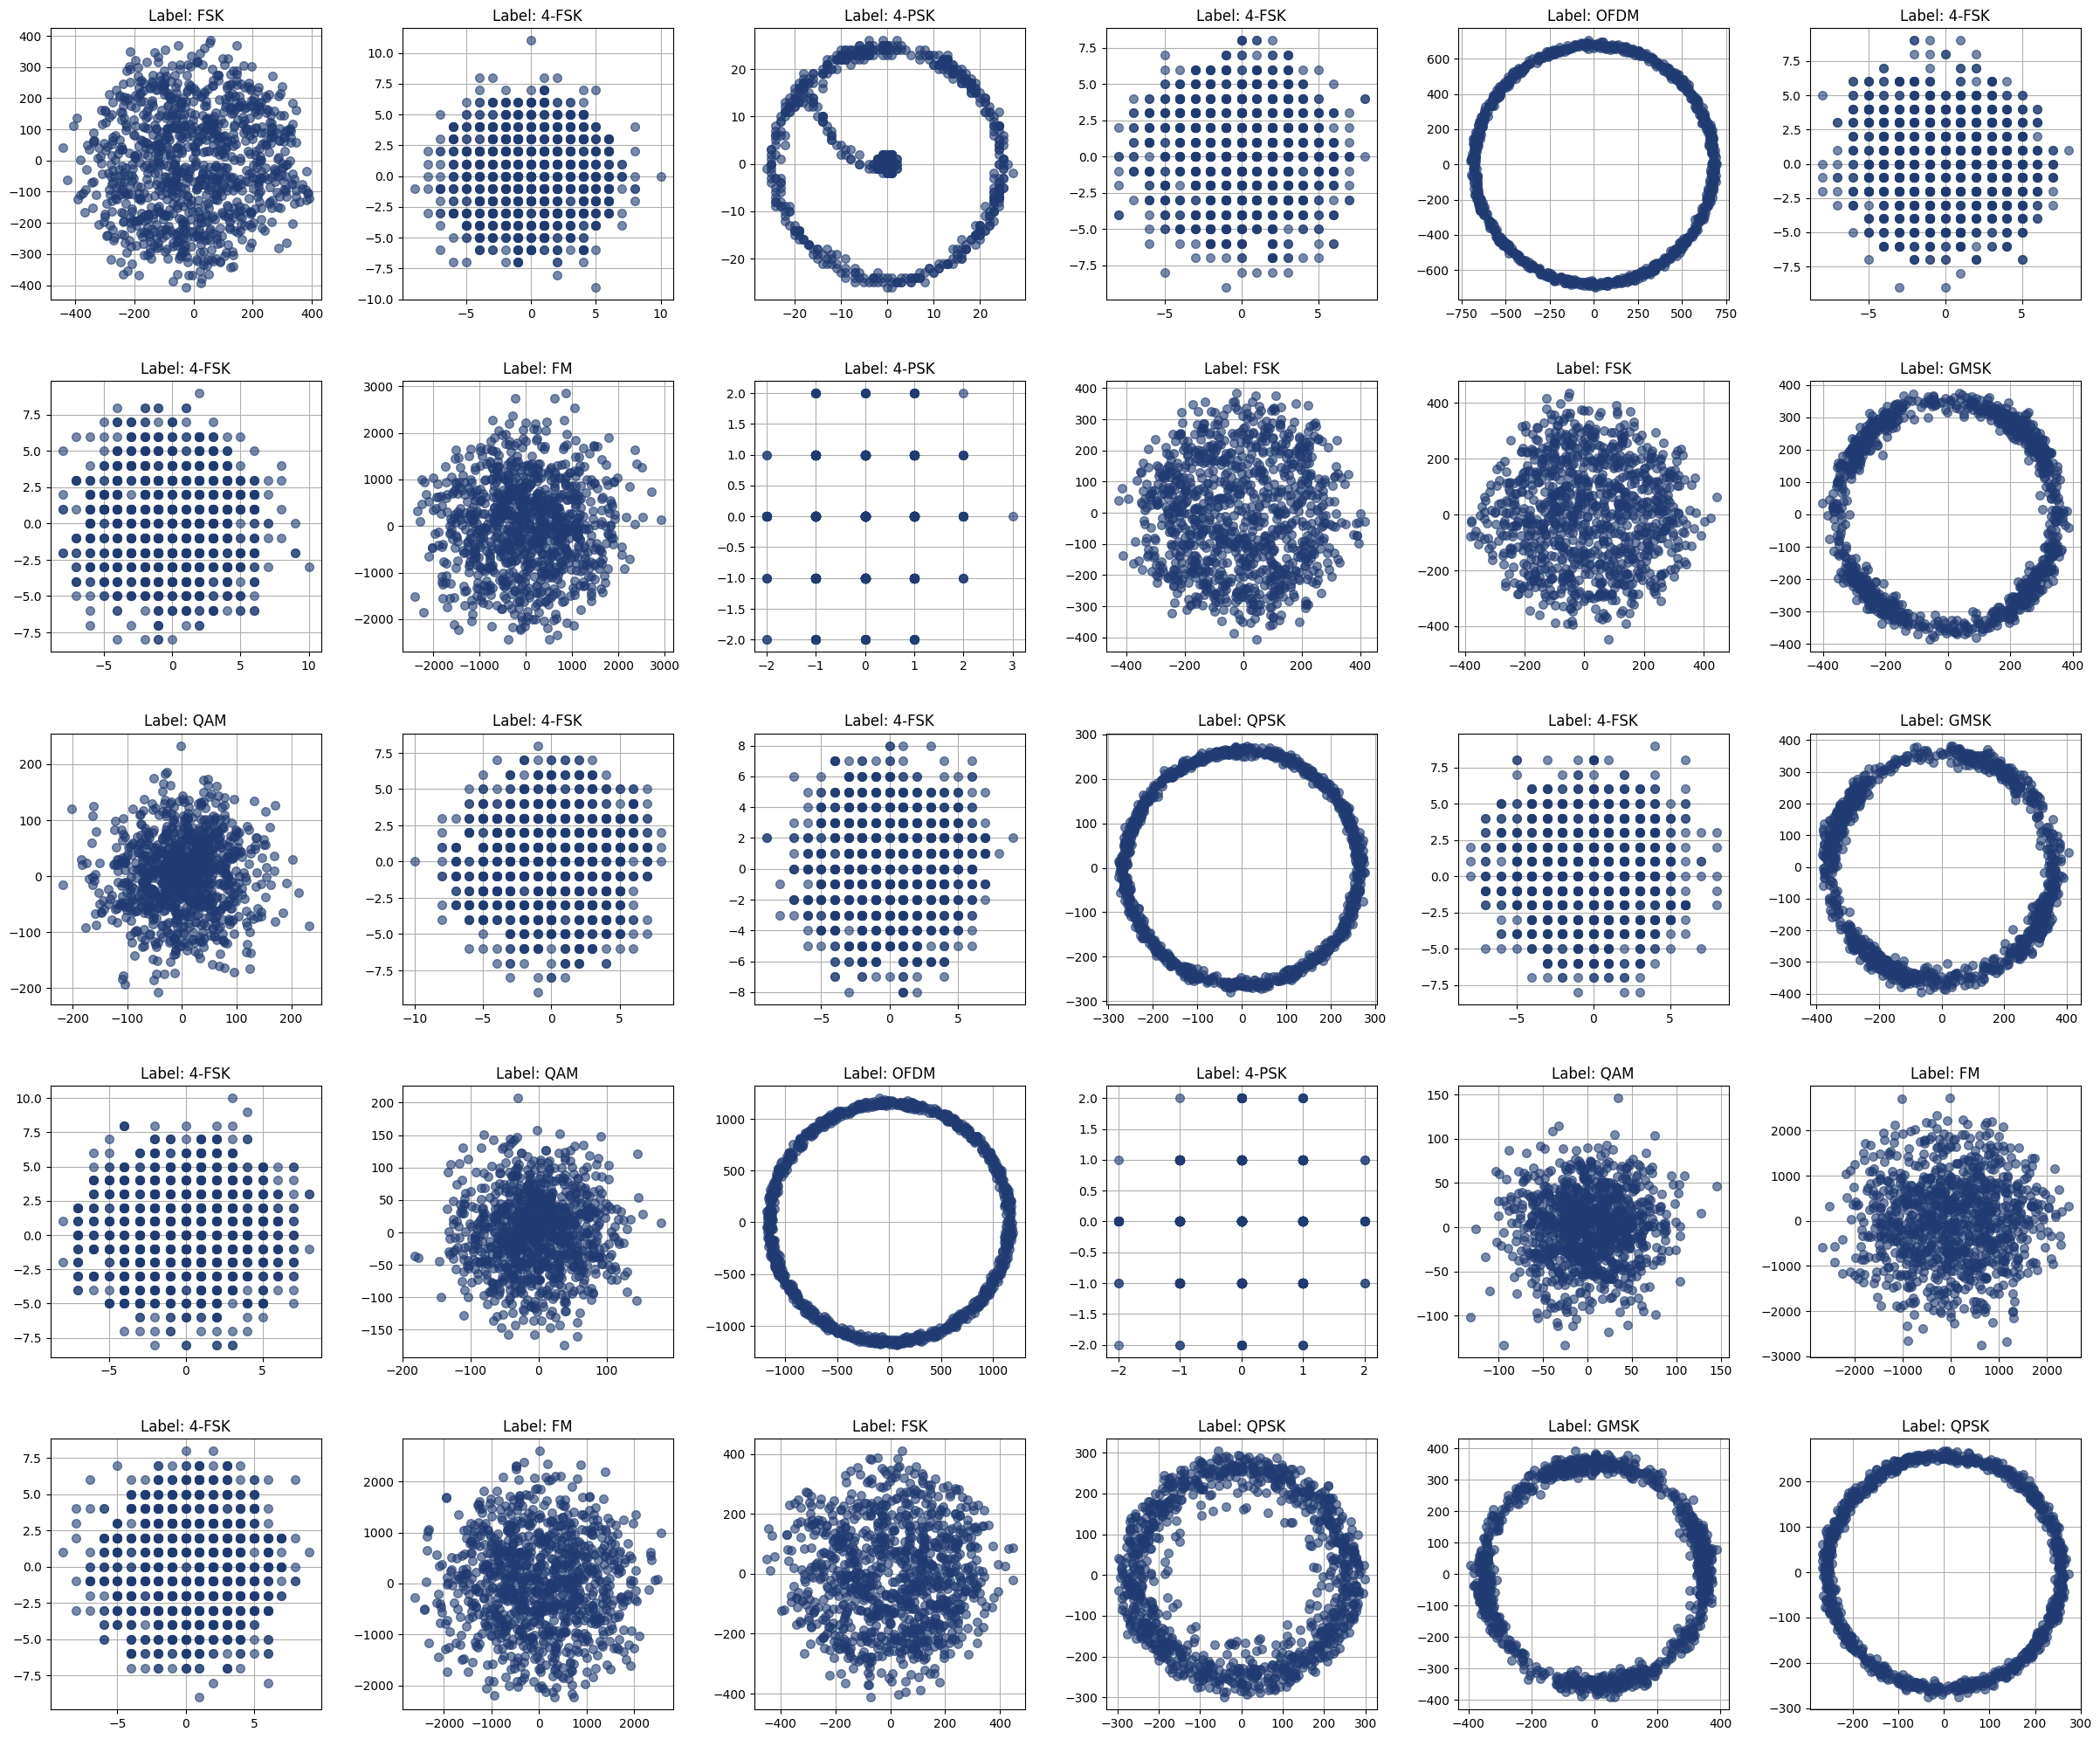

In [55]:
# 用 3*2 的6宫格展示前6个样本
import matplotlib.pyplot as plt

# clear the figure
plt.clf()

num_samples = 30
row_num = 5
col_num = 6

# torch.Size(torch.Size([6, 1, 1024, 2]))
samples = batch_sample[0][:num_samples]
labels = batch_sample[1][:num_samples]  # torch.Size([6])

labels_names = [
    # "QAM", "FSK", "FM", "GSMK", "OFDM", "4-FSK", "4-PSK", "QPSK"
    "QPSK", "4-PSK", "4-FSK", "OFDM", "GMSK", "FM", "FSK", "QAM"
]


# title: Samples of RF1024 data

plt.figure(figsize=(col_num*5, row_num*5),  facecolor='none')
# 最外面的x, y轴不显示
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.grid(False)
plt.axis('off')

for i in range(num_samples):
    plt.subplot(row_num, col_num, i+1)
    plt.grid(True)
    plt.axis('on')
    # line color: #203b71, use point, on line
    plt.plot(samples[i][0][:, 0], samples[i][0][:, 1], color='#203b71', marker='o', markersize=7, alpha=0.6, linestyle='None')
    label_name = labels_names[labels[i]]
    plt.title(f"Label: {label_name}")
    # plt.title(f"Label: {labels[i]}")

# , transparent=True, bbox_inches='tight'
# black grid lin
plt.savefig("rf1024_samples_dpi_100.png", dpi=100)

plt.show()

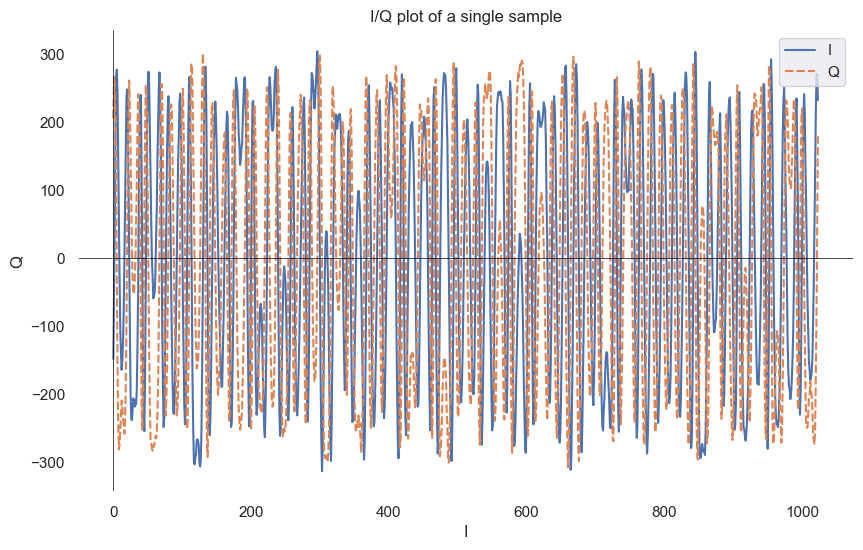

In [24]:
# use matlab draw single_sample : torch.Size([1024, 2])

import matplotlib.pyplot as plt
# plt.plot(single_sample[:,0], single_sample[:,1])
# plt.show()

# use seaborn draw single_sample
import seaborn as sns
import pandas as pd

df = pd.DataFrame(single_sample.numpy(), columns=['I', 'Q'])

sns.lineplot(data=df)
sns.despine()
sns.set_style("whitegrid")
sns.set_context("talk")
sns.set_palette("husl")
sns.set_theme("notebook")
# dpi = 300
sns.set(rc={'figure.figsize':(10, 6)})
plt.xlabel("I")
plt.ylabel("Q")
# no background
plt.gca().set_facecolor('white')
plt.grid(True)
# show x axis and y axis
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
title = "I/Q plot of a single sample"
plt.savefig("I_Q_plot.png")
plt.title(title)
plt.show()

# I 代表实部，Q 代表虚部
# 信号中的 I/Q 数据是复数，实部是 I，虚部是 Q
# 信号中的实部的含义: 信号的振幅
# 信号中的虚部的含义: 信号的相位



# EDA

## Data Distribution

In [31]:
# Data Distribution 
# 信号的振幅分布
data_path = str(
    rfml_dir / "data/rf1024_data/trainData.mat"
)
label_path = str(
    rfml_dir / "data/rf1024_data/trainLabels.mat"
)

train_data = dataloader.train_data(
    data_path = data_path,
    label_path = label_path,
    batch_size=32,
    shuffle=False
)

# show me the first batch
# batch_sample = next(iter(train_data))

# batch_sample[0].shape # torch.Size([32, 1, 1024, 2])

# 信号的相位分布

StopIteration: 